In [93]:
from flask import Flask
import pandas as pd
import numpy as np
import pymysql
from gevent import pywsgi
import fitz
from pptx import Presentation
import os
import win32com.client
from PIL import Image
from pptx_tools import utils
from pptx_tools.creator import PPTXCreator, PPTXPosition
from comtypes.client import Constants, CreateObject
import comtypes.client
from docx import Document
from PyPDF2 import PdfWriter, PdfReader
import logging

In [101]:
try:
    df_file = pd.read_csv(file_path_, dtype='str')
except:
    df_file = pd.read_excel(file_path_, dtype='str')


In [102]:
df_file

,3-4 山东省各市人口数,Unnamed: 1,Unnamed: 2
0,单位：万人,NaN,NaN
1,地区,常住人口,城镇人口
2,山东省,9847.16,5613.866161518288
3,济 南 市,713.2,484.6851219006561
4,青 岛 市,909.7,636.6577458931649
5,淄 博 市,464.2,312.22092
6,枣 庄 市,387.8,207.32930516365693
7,东 营 市,211.06,138.29005145356692
8,烟 台 市,701.41,423.3109761661407
9,潍 坊 市,927.72,517.6266361596579


In [98]:
pd.read_excel(r'\\172.30.10.237\ict\二所（数智经济研究所）\生产技术委员会\项目归档\0全国\0甲方资料\全国宏观\02统计资料\2015山东各市常住人口.xls')

,3-4 山东省各市人口数,Unnamed: 1,Unnamed: 2
0,单位：万人,NaN,NaN
1,地区,常住人口,城镇人口
2,山东省,9847.16,5613.866162
3,济 南 市,713.2,484.685122
4,青 岛 市,909.7,636.657746
5,淄 博 市,464.2,312.22092
6,枣 庄 市,387.8,207.329305
7,东 营 市,211.06,138.290051
8,烟 台 市,701.41,423.310976
9,潍 坊 市,927.72,517.626636


In [37]:
# 根据项目或城市名称形成下面
def find_file_index(name,type_name):
    path_0='\\\\172.30.10.237\\ict\\二所（数智经济研究所）\\生产技术委员会\\项目归档'
    if type_name=='district':
        return os.listdir(path_0+'\\'+name+'\\'+'0甲方资料')
    elif type_name='project':
        return os.listdir(path_0+'\\'+'0甲方资料')

['0全国',
 '上海市',
 '内蒙古自治区',
 '北京市',
 '四川省',
 '广东省',
 '广西壮族自治区',
 '新疆维吾尔自治区',
 '江苏省',
 '江西省',
 '河北省',
 '福建省',
 '重庆市',
 '陕西省']

In [85]:
def find_listdir(file_path):
    ls_0 = os.listdir(file_path)
    ls_result_file = []
    ls_result_filepath = []
    ls_result_project = []
    for i in ls_0:
        if os.path.isdir(os.path.join(file_path, i)):
            ls_result_file.extend(find_listdir(os.path.join(file_path, i))[0])
            ls_result_filepath.extend(find_listdir(os.path.join(file_path, i))[1])
        else:
            split_f = os.path.splitext(i)[1]
            if split_f.startswith('.'):
                format_f = split_f[1:]
                if format_f in ['txt', 'json', 'xml', 'pdf', 'avi', 'mp4',
                                'mov', 'wmv', 'mkv', 'doc', 'docx', 'ppt', 'pptx', 'csv', 'xls', 'xlsx']:
                    ls_result_file.append(i)
                    ls_result_filepath.append(os.path.join(file_path, i))
                elif format_f in ['jpg', 'jpeg', 'png', 'PNG', 'gif', 'bmp', 'JPG']:
                    ls_result_file.append(i)
                    ls_result_filepath.append(file_path)
                else:
                    ls_result_file.append(i)
                    ls_result_filepath.append('申请获得')
    return ls_result_file, ls_result_filepath

In [97]:
pd.DataFrame({'VisitorIP': 'visitor_ipddd', 'VisitTime': 'visit_timeddd'},index=[0])

,VisitorIP,VisitTime
1,visitor_ipddd,visit_timeddd


In [88]:
project_name='北京中国电科智慧创新园项目顶层规划'
province = df_dis.loc[df_dis['project_name'] == project_name]['district_name'].tolist()[0]
path_project=path_0+'\\'+province+'\\'+project_name
ls_re, ls_repath = find_listdir(path_project)
data = list(zip(ls_re, ls_repath))
df_data = pd.DataFrame(data, columns=['file_name', 'path'])

In [90]:
ls_repath

['\\\\172.30.10.237\\ict\\二所（数智经济研究所）\\生产技术委员会\\项目归档\\北京市\\北京中国电科智慧创新园项目顶层规划\\5最终成果\\中国电科（北京）智能科技产业园顶层规划设计-202112.pptx',
 '申请获得']

In [89]:
df_data

,file_name,path
0,中国电科（北京）智能科技产业园顶层规划设计-202112.pptx,\\172.30.10.237\ict\二所（数智经济研究所）\生产技术委员会\项目归档\北...
1,中国电科（北京）智能科技产业园多媒体方案-202112.MP4,申请获得


In [82]:
ls_re

['上海申能项目-非院级项目意见落实表.doc',
 '技术审查会-专家意见表--申能数字孪生-吴梦荷.docx',
 '技术审查会-专家意见表--申能数字孪生-吴梦荷.jpg',
 '申能集团重点风貌保护单位数字孪生智慧保护成果报告(加扉页).pdf',
 '申能集团重点风貌保护单位数字孪生智慧保护成果报告-最终成果.pdf',
 '申能集团重点风貌保护单位数字孪生智慧保护成果报告-最终汇报.pdf']

In [92]:
# ls_0=os.listdir(r'\\172.30.10.237\ict\二所（数智经济研究所）\生产技术委员会\项目归档')
path_0='\\\\172.30.10.237\\ict\\二所（数智经济研究所）\\生产技术委员会\\项目归档'
ls_0=os.listdir(path_0)
# df_ori=pd.DataFrame()
ls_dis=[]
for i in ls_0:
    if os.path.isdir(path_0+'\\'+i):
        ls_list_i=os.listdir(path_0+'\\'+i)
        ls_list_i_1=[x for x in ls_list_i if not x.startswith('0')]
        # ls_list_i_2=[i]
        for a in ls_list_i_1:
            if os.path.isdir(path_0+'\\'+i+'\\'+a):
                if len(os.listdir(path_0+'\\'+i+'\\'+a))==0:
                    ls_list_i_2=[i,a,'尚未收集']
                else:
                    ls_list_i_2=[i,a,'收集完成']
                ls_dis.append(ls_list_i_2)
df_dis=pd.DataFrame(ls_dis,columns=['district_name','project_name','detail'])
# df_ori=pd.concat([df_ori,df_dis],axis=0)
# df_2=df_ori.reset_index(drop=True)
df_dis

,district_name,project_name,detail
0,0全国,国家发改委新型城镇化大数据平台,收集完成
1,上海市,重点风貌保护单位数字孪生智慧保护服务项目,收集完成
2,内蒙古自治区,伊利现代智慧健康谷智慧城市建设规划,收集完成
3,内蒙古自治区,察哈尔右翼中旗自然资源局城市规划,尚未收集
4,内蒙古自治区,鄂尔多斯人才科教城规划概念设计方案,收集完成
5,内蒙古自治区,鄂尔多斯市康巴什区非住宅商品房去库存实施方案,收集完成
6,内蒙古自治区,鄂尔多斯康巴什东部重点区域城市设计,尚未收集
7,内蒙古自治区,鄂尔多斯高新技术产业开发区城市发展规划,尚未收集
8,北京市,中关村街道产业绩效量化评估,尚未收集
9,北京市,中关村街道人群活动特征大数据评估,尚未收集


In [79]:
df_dis.loc[df_dis['project_name']=='伊利现代智慧健康谷智慧城市建设规划']['district_name'].tolist()[0]

'内蒙古自治区'

In [75]:
df_dis_1=df_dis.copy()
df_dis_1.loc[:,'project_info']='info'
df_multi_index_1=df_dis_1.set_index(['district_name','project_name'])
df_multi_index_1

project_info
district_name project_name                                
0全国           国家发改委新型城镇化大数据平台                         info
上海市           重点风貌保护单位数字孪生智慧保护服务项目                    info
内蒙古自治区        伊利现代智慧健康谷智慧城市建设规划                       info
              察哈尔右翼中旗自然资源局城市规划                        info
              鄂尔多斯人才科教城规划概念设计方案                       info
              鄂尔多斯市康巴什区非住宅商品房去库存实施方案                  info
              鄂尔多斯康巴什东部重点区域城市设计                       info
              鄂尔多斯高新技术产业开发区城市发展规划                     info
北京市           中关村街道产业绩效量化评估                           info
              中关村街道人群活动特征大数据评估                        info
              北京中国电科智慧创新园项目顶层规划                       info
              北京城市副中心城市运营监测与分析                        info
              北京市十三五大数据产业发展方案                         info
              通州文旅产业研究                                info
四川省           四川省自贡市高新区功能调整研究                         info
              四川省自贡市高新区空间发展研究                         info
广东省           基于大数据的顺德北部人口分布及流动研究                     info
              广州数字名城前瞻性战略研究                           info
              顺德影响力研究                                 info
广西壮族自治区       来宾市临港产业园莆田作业区总体策划与概念规划                  info
              来宾市工业园区产业集群产业规划                         info
新疆维吾尔自治区      上库石油石化产业园产业规划与空间布局规划                    info
              库尔勒上库综合产业园区管理委员会上库高新区产业服务小镇空间规划         info
              库尔勒市产业发展体检与评估                           info
              库尔勒市塔什店镇产业发展规划编制                        info
              库尔勒鸿雁河新区产业规划项目                          info
              新疆阿克苏市数字经济发展产业专项规划项目                    info
              新疆阿克苏市柯柯牙河治理水系规划                        info
              沙雅县产业规划                                 info
              阿克苏市南城片区城市设计                            info
              阿克苏市规划局东城片区城市设计                         info
江苏省           淮安市施河镇现代农业食品产业园                         info
江西省           萍乡经开区总体发展空间布局及产业规划                      info
              赣州市城市总体规划大数据分析与评估                       info
河北省           北戴河新区产业与空间一体化总体设计                       info
              石家庄经济技术开发区产业发展规划                        info
福建省           厦门-泉州科技创新走廊                             info
              泉州市清源山花博园片区概念性总体策划                      info
              福建省莆田市高铁核心区周边区域产业整合提升规划                 info
              福鼎“世界白茶中心”总体城市设计国际竞赛                    info
              莆田市产业园区整合提升规划                           info
              莆阳新城总体策划规划一体化研究                         info
重庆市           重庆綦江信息安全谷规划                             info
陕西省           榆林市产业大脑                                 info
              榆林市亩均效益综合评价平台技术服务项目                     info

In [73]:
df_multi_index_1.loc[df_multi_index_1.index=='鄂尔多斯人才科教城规划概念设计方案','project_info']

Series([], Name: project_info, dtype: object)

In [67]:
df_multi_index=df_dis.set_index(['district_name','project_name'])
df_multi_index.to_html(r'E:\pythonProject\flask_project\flask_test\static\test_chart.html',classes='clickable')

In [65]:
df_multi_index.index

MultiIndex([(     '0全国',                 '国家发改委新型城镇化大数据平台'),
            (     '上海市',            '重点风貌保护单位数字孪生智慧保护服务项目'),
            (  '内蒙古自治区',               '伊利现代智慧健康谷智慧城市建设规划'),
            (  '内蒙古自治区',                '察哈尔右翼中旗自然资源局城市规划'),
            (  '内蒙古自治区',               '鄂尔多斯人才科教城规划概念设计方案'),
            (  '内蒙古自治区',          '鄂尔多斯市康巴什区非住宅商品房去库存实施方案'),
            (  '内蒙古自治区',               '鄂尔多斯康巴什东部重点区域城市设计'),
            (  '内蒙古自治区',             '鄂尔多斯高新技术产业开发区城市发展规划'),
            (     '北京市',                   '中关村街道产业绩效量化评估'),
            (     '北京市',                '中关村街道人群活动特征大数据评估'),
            (     '北京市',               '北京中国电科智慧创新园项目顶层规划'),
            (     '北京市',                '北京城市副中心城市运营监测与分析'),
            (     '北京市',                 '北京市十三五大数据产业发展方案'),
            (     '北京市',                        '通州文旅产业研究'),
            (     '四川省',                 '四川省自贡市高新区功能调整研究'),
            (     '四川省',                 '四川省自贡市高新区空间发展研究'),
            (     '广东省',

In [29]:
ls=[
    '上库石油石化产业园产业规划与空间布局规划',
'库尔勒市塔什店镇产业发展规划编制',
'伊利现代智慧健康谷智慧城市建设规划',
'淮安市施河镇现代农业食品产业园',
'石家庄经济技术开发区产业发展规划',
'鄂尔多斯康巴什东部重点区域城市设计',
'北戴河新区产业与空间一体化总体设计',
'来宾市临港产业园莆田作业区总体策划与概念规划',
'泉州市清源山花博园片区概念性总体策划',
'四川省自贡市高新区功能调整研究',
'四川省自贡市高新区空间发展研究',
'察哈尔右翼中旗自然资源局城市规划',
'榆林市产业大脑',
'鄂尔多斯市康巴什区非住宅商品房去库存实施方案',
'萍乡经开区总体发展空间布局及产业规划',
'重点风貌保护单位数字孪生智慧保护服务项目',
'阿克苏市规划局东城片区城市设计',
'阿克苏市南城片区城市设计',
'莆田市产业园区整合提升规划',
'库尔勒市产业发展体检与评估',
'沙雅县产业规划',
'库尔勒鸿雁河新区产业规划项目',
'重庆綦江信息安全谷规划',
'新疆阿克苏市数字经济发展产业专项规划项目',
'榆林市亩均效益综合评价平台技术服务项目',
'来宾市工业园区产业集群产业规划',
'新疆阿克苏市柯柯牙河治理水系规划',
'福鼎“世界白茶中心”总体城市设计国际竞赛',
'鄂尔多斯人才科教城规划概念设计方案',
'北京市十三五大数据产业发展方案',
'赣州市城市总体规划大数据分析与评估',
'中关村街道人群活动特征大数据评估',
'中关村街道产业绩效量化评估',
'基于大数据的顺德北部人口分布及流动研究',
'北京城市副中心城市运营监测与分析',
'广州数字名城前瞻性战略研究',
'顺德影响力研究',
'通州文旅产业研究',
'国家发改委新型城镇化大数据平台',
'厦门-泉州科技创新走廊',
'莆阳新城总体策划规划一体化研究',
'福建省莆田市高铁核心区周边区域产业整合提升规划',
'库尔勒上库综合产业园区管理委员会上库高新区产业服务小镇空间规划',
'北京中国电科智慧创新园项目顶层规划',
'鄂尔多斯高新技术产业开发区城市发展规划',
]

In [31]:
[x for x in ls if x not in ls2]

[]

In [28]:
ls2

['国家发改委新型城镇化大数据平台',
 '重点风貌保护单位数字孪生智慧保护服务项目',
 '伊利现代智慧健康谷智慧城市建设规划',
 '察哈尔右翼中旗自然资源局城市规划',
 '鄂尔多斯人才科教城规划概念设计方案',
 '鄂尔多斯市康巴什区非住宅商品房去库存实施方案',
 '鄂尔多斯康巴什东部重点区域城市设计',
 '鄂尔多斯高新技术产业开发区城市发展规划',
 '中关村街道产业绩效量化评估',
 '中关村街道人群活动特征大数据评估',
 '北京中国电科智慧创新园项目顶层规划',
 '北京城市副中心城市运营监测与分析',
 '北京市十三五大数据产业发展方案',
 '通州文旅产业研究',
 '四川省自贡市高新区功能调整研究',
 '四川省自贡市高新区空间发展研究',
 '基于大数据的顺德北部人口分布及流动研究',
 '广州数字名城前瞻性战略研究',
 '顺德影响力研究',
 '来宾市临港产业园莆田作业区总体策划与概念规划',
 '来宾市工业园区产业集群产业规划',
 '上库石油石化产业园产业规划与空间布局规划',
 '库尔勒上库综合产业园区管理委员会上库高新区产业服务小镇空间规划',
 '库尔勒市产业发展体检与评估',
 '库尔勒市塔什店镇产业发展规划编制',
 '库尔勒鸿雁河新区产业规划项目',
 '新疆阿克苏市数字经济发展产业专项规划项目',
 '新疆阿克苏市柯柯牙河治理水系规划',
 '沙雅县产业规划',
 '阿克苏市南城片区城市设计',
 '阿克苏市规划局东城片区城市设计',
 '淮安市施河镇现代农业食品产业园',
 '萍乡经开区总体发展空间布局及产业规划',
 '赣州市城市总体规划大数据分析与评估',
 '北戴河新区产业与空间一体化总体设计',
 '石家庄经济技术开发区产业发展规划',
 '厦门-泉州科技创新走廊',
 '泉州市清源山花博园片区概念性总体策划',
 '福建省莆田市高铁核心区周边区域产业整合提升规划',
 '福鼎“世界白茶中心”总体城市设计国际竞赛',
 '莆田市产业园区整合提升规划',
 '莆阳新城总体策划规划一体化研究',
 '重庆綦江信息安全谷规划',
 '榆林市产业大脑',
 '榆林市亩均效益综合评价平台技术服务项目']

In [26]:
ls2=df_ori.reset_index(drop=True)['project_name'].unique().tolist()
len(ls2)

45

In [4]:
ls=[1,2.3,4]
ls1=[2,3,4,5]
ls2=[3,5,6,7]
list(zip(ls,ls1,ls2))

[(1, 2, 3), (2.3, 3, 5), (4, 4, 6)]

In [17]:
def docx_to_pdf(docx_file, pdf_file):
    doc = Document(docx_file)
    doc.save(pdf_file)


def doc_to_pdf(doc_file, pdf_file):
    word = comtypes.client.CreateObject('Word.Application')
    doc = word.Documents.Open(doc_file)
    doc.SaveAs(pdf_file, FileFormat=17)
    doc.Close()
    word.Quit()


def convert_to_pdf(input_file, output_file):
    if input_file.endswith('.docx'):
        docx_to_pdf(input_file, output_file)
    elif input_file.endswith('.doc'):
        doc_to_pdf(input_file, output_file)
    else:
        raise ValueError('Unsupported input file format')

input_path = r'\\172.30.10.237\ict\二所（数智经济研究所）\生产技术委员会\项目归档\新疆维吾尔自治区\0甲方资料\库尔勒市\01-规划资料\01-上位规划\库尔勒上库高新技术产业开发区总体规划修编\上库扩区-本子\文字\03上库高新技术产业园区总体规划 说明书2019.1.29.doc'  # 输入的.doc或.docx文件路径
output_path = r'E:\pythonProject\flask_project\flask_test\static\temp_pic\03上库高新技术产业园区总体规划 说明书2019.1.29.pdf'  # 输出的.pdf文件路径
convert_to_pdf(input_path, output_path)

In [3]:
def copy_file(source_path, target_path):
    with open(source_path, 'rb') as source_file:
        with open(target_path, 'wb') as target_file:
            target_file.write(source_file.read())
source_path = r'\\172.30.10.237\ict\二所（数智经济研究所）\生产技术委员会\项目归档\新疆维吾尔自治区\0甲方资料\库尔勒市\01-规划资料\01-上位规划\库尔勒上库高新技术产业开发区总体规划修编\上库扩区-本子\起步区\08上库综合产业园用地现状分析图.jpg'
png_ = r'E:\pythonProject\flask_project\flask_test\static\temp_pic\08上库综合产业园用地现状分析图.jpg'
copy_file(source_path,png_)

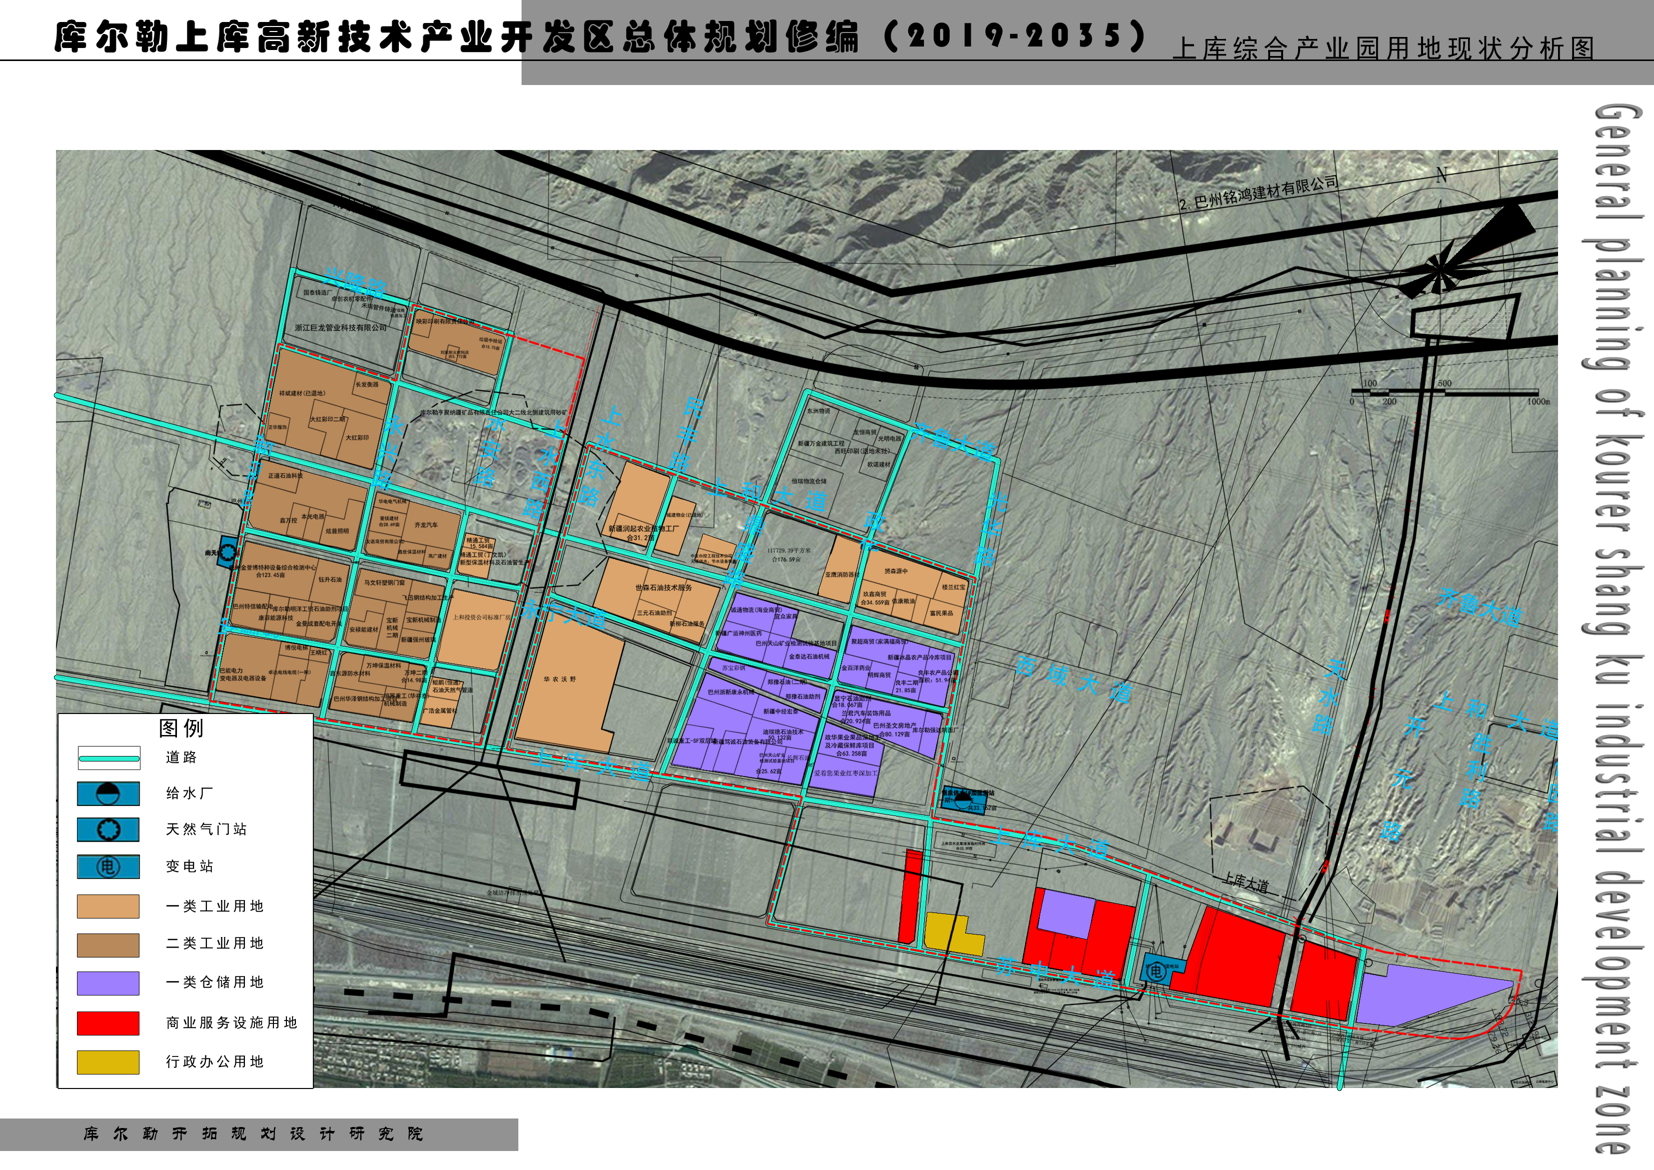

In [9]:
im = Image.open(source_path)
im.resize((int(im.size[0]/2), int(im.size[1]/2)))

In [10]:
file_path_
images1=['00-封皮-文本.jpg', '00-封皮-说明书.jpg', '00-封面-文本.jpg', '00-封面-说明书.jpg']
images = [os.path.join(file_path_, x) for x in images1]

True

In [2]:
file_path='172.30.10.237/ict/二所（数智经济研究所）/生产技术委员会/项目归档/新疆维吾尔自治区/0甲方资料/库尔勒市/01-规划资料/01-上位规划/12、巴州库尔勒产业服务小镇控规/01-总体规划文本.pdf'
file_path_ = '\\\\' + file_path.replace('/', '\\')
file_path_

'\\\\172.30.10.237\\ict\\二所（数智经济研究所）\\生产技术委员会\\项目归档\\新疆维吾尔自治区\\0甲方资料\\库尔勒市\\01-规划资料\\01-上位规划\\12、巴州库尔勒产业服务小镇控规\\01-总体规划文本.pdf'

In [6]:
pdf = fitz.open(file_path_)
pdf.page_count

46

In [5]:
name = file_path_.split('\\')[-1]
filename = os.path.splitext(name)[0]
filetype = os.path.splitext(name)[1][1:]
print(name,filename,filetype)

01-总体规划文本.pdf 01-总体规划文本 pdf


In [4]:
filetype in ['pdf']

False

In [13]:
ls_file=os.listdir('E:\\pythonProject\\flask_project\\flask_test\\static')
[os.path.join('E:\\pythonProject\\flask_project\\flask_test\\static',x) for x in ls_file]

['E:\\pythonProject\\flask_project\\flask_test\\static\\example.pdf',
 'E:\\pythonProject\\flask_project\\flask_test\\static\\example.png',
 'E:\\pythonProject\\flask_project\\flask_test\\static\\file_index.csv',
 'E:\\pythonProject\\flask_project\\flask_test\\static\\file_index_.csv',
 'E:\\pythonProject\\flask_project\\flask_test\\static\\temp_pic',
 'E:\\pythonProject\\flask_project\\flask_test\\static\\幻灯片1.PNG',
 'E:\\pythonProject\\flask_project\\flask_test\\static\\幻灯片2.PNG',
 'E:\\pythonProject\\flask_project\\flask_test\\static\\幻灯片3.PNG',
 'E:\\pythonProject\\flask_project\\flask_test\\static\\幻灯片4.PNG']

In [5]:
file_path=
png_ = r'E:\pythonProject\flask_project\flask_test\static\temp_pic'
file_path_ = file_path.replace('/', '\\')
name = file_path_.split('\\')[-1]
filename = os.path.splitext(name)[0]
sorted(os.listdir(os.path.join(png_, filename)))

['幻灯片1.PNG', '幻灯片2.PNG', '幻灯片3.PNG', '幻灯片4.PNG']

In [4]:
os.rmdir(r'E:\pythonProject\flask_project\flask_test\static\temp_pic\多媒体-图谱4页')

OSError: [WinError 145] 目录不是空的。: 'E:\\pythonProject\\flask_project\\flask_test\\static\\temp_pic\\多媒体-图谱4页'

In [ ]:
ppt=r'E:\project_项目\01福鼎白茶\多媒体-图谱4页.pptx'
png_=r'E:\pythonProject\flask_project\flask_test\static\temp_pic'
name=ppt.split('\\')[-1]
file_name=os.path.splitext(name)[0]

In [18]:
str_ppt='172.30.10.237/ict/二所（数智经济研究所）/生产技术委员会/项目归档/新疆维吾尔自治区/库尔勒鸿雁河新区产业规划项目/5最终成果/鸿雁河新区完整版 20211115.pptx'
str_ppt1='\\\\'+str_ppt.replace('/','\\')
str_ppt1
# repr

'\\\\172.30.10.237\\ict\\二所（数智经济研究所）\\生产技术委员会\\项目归档\\新疆维吾尔自治区\\库尔勒鸿雁河新区产业规划项目\\5最终成果\\鸿雁河新区完整版 20211115.pptx'

In [2]:
ppt=r'\\172.30.10.237\ict\二所（数智经济研究所）\生产技术委员会\项目归档\新疆维吾尔自治区\0甲方资料\库尔勒市\06-前期调研\0718巴州库尔勒上位解读.pptx'
png_=r'E:\pythonProject\flask_project\flask_test\static\temp_pic'
name=ppt.split('\\')[-1]
file_name=os.path.splitext(name)[0]
utils.save_pptx_as_png(save_folder=os.path.join(png_,file_name),pptx_filename=ppt,overwrite_folder=True)

True

In [15]:
ppt='\\172.30.10.237\ict\二所（数智经济研究所）\生产技术委员会\项目归档\新疆维吾尔自治区\库尔勒鸿雁河新区产业规划项目\5最终成果\鸿雁河新区完整版 20211115.pptx'
ppt1='\\'+ppt.replace('\\','\\')

In [16]:
ppt1

'\\\\172.30.10.237\\ict\\二所（数智经济研究所）\\生产技术委员会\\项目归档\\新疆维吾尔自治区\\库尔勒鸿雁河新区产业规划项目\x05最终成果\\鸿雁河新区完整版 20211115.pptx'

In [13]:
png_=r'E:\pythonProject\flask_project\flask_test\static\temp_pic'
name=ppt.split('\\')[-1]
file_name=os.path.splitext(name)[0]
utils.save_pptx_as_png(save_folder=os.path.join(png_,file_name),pptx_filename=ppt1,overwrite_folder=True)

COMError: (-2147467259, '未指定的错误', (None, None, None, 0, None))

In [3]:
ppt

'\\\\172.30.10.237\\ict\\二所（数智经济研究所）\\生产技术委员会\\项目归档\\新疆维吾尔自治区\\0甲方资料\\库尔勒市\\06-前期调研\\0718巴州库尔勒上位解读.pptx'

In [4]:
name

'0718巴州库尔勒上位解读.pptx'

In [92]:
os.path.join(png_,file_name)

'E:\\pythonProject\\flask_project\\flask_test\\static\\temp_pic\\多媒体-图谱4页'

In [97]:
PPTXCreator(Presentation(ppt))

AttributeError: 'Presentation' object has no attribute 'prs'

In [8]:
ppt=r'E:\project_项目\01福鼎白茶\多媒体-图谱4页.pptx'
png_=r'E:\pythonProject\flask_project\flask_test\static\temp_pic'
prs = Presentation(ppt)
name=ppt.split('\\')[-1]
file_name=os.path.splitext(name)[0]
for slide_idx, slide in enumerate(prs.slides):
    file_name_slide=file_name+'_'+str(slide_idx)+'.png'
    png_dic_path=os.path.join(png_,file_name)
    slide.export(os.path.join(png_dic_path,file_name_slide), overwrite_folder=True)

AttributeError: 'Slide' object has no attribute 'export'

In [ ]:
PPTXCreator()

In [89]:
prs.save_as_png('E:\\pythonProject\\flask_project\\flask_test\\static\\temp_pic\\多媒体-图谱4页', overwrite_folder=True)

AttributeError: 'Presentation' object has no attribute 'save_as_png'

In [88]:
os.path.join(png_dic_path,file_name_slide)

'E:\\pythonProject\\flask_project\\flask_test\\static\\temp_pic\\多媒体-图谱4页\\多媒体-图谱4页_0.png'

In [ ]:
ppt=r'E:\project_项目\01福鼎白茶\多媒体-图谱4页.pptx'
png_=r'E:\pythonProject\flask_project\flask_test\static\temp_pic'
name=ppt.split('\\')[-1]
file_name=os.path.splitext(name)[0]
.save_as_png(os.path.join(png_,file_name), overwrite_folder=True)

In [82]:
os.path.join(png_,file_name)

'E:\\pythonProject\\flask_project\\flask_test\\static\\temp_pic\\多媒体-图谱4页'

In [76]:
ppt=r'E:\project_项目\01福鼎白茶\多媒体-图谱4页.pptx'
doc=fitz.open(ppt)
doc.page_count

1

In [3]:
str_='E:/project_项目/01福鼎白茶/多媒体-图谱4页.pptx'
str_.split('/')[-1]
os.path.splitext(str_)[0]

'多媒体-图谱4页.pptx'

In [70]:
def ppt2png(ppt, filename):
    # 打开PPT程序
    ppt_app = win32com.client.Dispatch('PowerPoint.Application')
    # 打开ppt文件（后台模式）
    ppt = ppt_app.Presentations.Open(ppt)
    # ppt.visible=0
    # 打开的PPT另存为图片文件。17数字是ppt转图片，32数字是ppt转pdf。
    ppt.SaveAs(filename, 17)
    print("导出成png格式成功!!!")
    # 退出PPT程序
    ppt_app.Quit()

In [71]:
ppt='E:/project_项目/01福鼎白茶/多媒体-图谱4页.pptx'
filename=r'E:\pythonProject\flask_project\flask_test\static\temp_pic\多媒体-图谱4页.png'
ppt2png(ppt, filename)

导出成png格式成功!!!


In [ ]:
def pptx_to_png(pptx_path, output_dir):
    # 打开PPTX文件
    prs = Presentation(pptx_path)
    
    # 遍历PPTX中的每一页
    for slide_idx, slide in enumerate(prs.slides):
        # 使用Pillow创建一个图像对象
        placeholder = slide.placeholders[0]
        placeholder.image.blob.seek(0)
        image_binary = placeholder.image.blob.read()
        image = Image.open(io.BytesIO(image_binary))
        
        # 将图像保存为PNG文件
        image_path = os.path.join(output_dir, f"slide_{slide_idx + 1}.png")
        image.save(image_path, "PNG")

In [78]:
ppt=r'E:\project_项目\01福鼎白茶\多媒体-图谱4页.pptx'
output_dir=r'E:\pythonProject\flask_project\flask_test\static\temp_pic'
prs = Presentation(ppt)
for slide_idx, slide in enumerate(prs.slides):
    print(slide_idx, slide)
    print(slide.placeholders[0])

0 <pptx.slide.Slide object at 0x000001768393A400>


KeyError: 'no placeholder on this slide with idx == 0'

In [66]:
ppt=r'E:\project_项目\01福鼎白茶\多媒体-图谱4页.pptx'
output_dir=r'E:\pythonProject\flask_project\flask_test\static\temp_pic'
prs = Presentation(ppt)
for slide in prs.slides:
    slide_number=slide.slide_id
    # print(str(slide.slide_id))
    _path = f"slide_{slide_number}.png"
    name=ppt.split('/')[-1]
    file_name=os.path.splitext(name)[0]
    direc_path=os.path.join(output_dir,file_name)
    slide.export_to_image(os.path.join(direc_path,_path),dpi=300)

AttributeError: 'Slide' object has no attribute 'export_to_image'

In [67]:
os.path.join(direc_path,_path)

'E:\\project_项目\\01福鼎白茶\\多媒体-图谱4页\\slide_303.png'

In [ ]:
def pptx_to_png(input_file, output_dir):
    name=input_file.split('/')[-1]
    file_name=os.path.splitext(name)[0]
    # 检查输出目录是否存在，不存在则创建
    if not os.path.exists(os.path.join(output_dir,file_name)):
        os.makedirs(os.path.join(output_dir,file_name))
    
    # 打开PPTX文件
    prs = Presentation(input_file)
    
    # 遍历所有幻灯片
    for slide in prs.slides:
        # 创建一个PPTX页面的临时PDF
        slide_number = slide.slide_id.split('_')[1]
        pdf_path = f"slide_{slide_number}.pdf"
        slide.export_to_pdf(pdf_path)
        
        # 打开PDF文件
        pdf = fitz.open(pdf_path)
        for page_number in range(len(pdf.pages)):
            # 将每一页转换为PNG图片
            page = pdf[page_number]
            pix = page.get_pixmap()
            png_path = os.path.join(output_dir, f"slide_{slide_number}_page_{page_number + 1}.png")
            pix.write_png(png_path)
        pdf.close()
        os.remove(pdf_path)  # 删除临时PDF文件


In [31]:
ppt_path = r"E:\project_项目\01福鼎白茶\多媒体-图谱4页.pptx"  # PPT文件路径
png_folder = r"E:\pythonProject\flask_project\flask_test\static\temp_pic"  # 输出PNG图片的文件夹路径

doc = fitz.open(ppt_path)
file_name=ppt_path.split('\\')[-1]
name=os.path.splitext(file_name)[0]


In [32]:
zoom=3
if not os.path.exists(os.path.join(png_folder,name)):
    os.makedirs(os.path.join(png_folder,name))
    
# 遍历PPT的每一页
for page_num in range(doc.page_count):
    # 获取页面
    page = doc.load_page(page_num)
    # 创建一个图片名称
    png_name = f"page_{page_num + 1}.png"
    # 渲染页面到图片，并指定缩放比例
    pix = page.get_pixmap(alpha=False, matrix=fitz.Matrix(zoom, zoom))
    # 保存图片到指定文件夹
    
    pix.save(f"{png_folder}\\{name}\\{png_name}")
# 关闭PPT文档
# doc.close()

In [37]:
doc

Document('E:\project_项目\01福鼎白茶\多媒体-图谱4页.pptx')

In [22]:
os.path.join(png_folder,name)

'E:\\pythonProject\\flask_project\\flask_test\\static\\temp_pic\\多媒体-图谱4页'

In [23]:
name

'多媒体-图谱4页'

In [11]:
def ppt_to_png(ppt_path, png_folder, zoom=3):
    # 打开PPT文件
    doc = fitz.open(ppt_path)
    file_name=ppt_path.split('/')[-1]
    name=os.path.splitext(file_name)[0]
    os.makedirs(os.path.join(png_folder,name))
    # 遍历PPT的每一页
    for page_num in range(len(doc)):
        # 获取页面
        page = doc[page_num]
        # 创建一个图片名称
        png_name = f"page_{page_num + 1}.png"
        # 渲染页面到图片，并指定缩放比例
        pix = page.get_pixmap(alpha=False, matrix=fitz.Matrix(zoom, zoom))
        # 保存图片到指定文件夹
        
        pix.save(f"{png_folder}\\{name}\\{png_name}")
    # 关闭PPT文档
    doc.close()
 
# 使用示例
ppt_path = r"E:\project_项目\01福鼎白茶\多媒体-图谱4页.pptx"  # PPT文件路径
png_folder = r"E:\pythonProject\flask_project\flask_test\static\temp_pic"  # 输出PNG图片的文件夹路径
ppt_to_png(ppt_path, png_folder)

FzErrorSystem: code=2: cannot remove file 'E:\pythonProject\flask_project\flask_test\static\temp_pic\E:\project_项目\01福鼎白茶\多媒体-图谱4页\page_1.png': Invalid argument

In [9]:
app=Flask(__name__)
@app.route('/')
def hello():
    return 'hello'
if __name__=='__main__':
    #sever=pywsgi.WSGIServer(('127.0.0.1',5000),app)
    #sever.serve_forever()
    app.run(debug=True,host='0.0.0.0')

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.20.20.57:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\duanyousheng\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3513: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [14]:
doc = fitz.open(r'E:\pythonProject\flask_project\flask_test\static/example.pdf')
page = doc.load_page(1)
zoom_x = 2.0  # horizontal zoom
zoom_y = 2.0  # vertical zoom
mat = fitz.Matrix(zoom_x, zoom_y)  # zoom factor 2 in each dimension
pix = page.get_pixmap(matrix=mat)  # use 'mat' instead of the identity matrix 作者：dupaper https://www.bilibili.com/read/cv24281402/ 出处：bilibili
print(doc.page_count)
print(pix)

41
Pixmap(DeviceRGB, (0, 0, 1920, 1080), 0)


In [7]:
pix.save(r'E:\pythonProject\flask_project\flask_test\static/example.png')

In [9]:
page.get_svg_image()

'<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" version="1.1" width="960" height="540" viewBox="0 0 960 540">\n<defs>\n<clipPath id="clip_1">\n<path transform="matrix(1,0,0,-1,0,540)" d="M0 .00012207H960V540.0001H0Z" fill-rule="evenodd"/>\n</clipPath>\n<clipPath id="clip_2">\n<path transform="matrix(1,0,0,-1,0,540)" d="M-.00000029 540H960V.00012207H-.00000029" fill-rule="evenodd"/>\n</clipPath>\n<clipPath id="clip_3">\n<path transform="matrix(1,0,0,-1,0,540)" d="M.000014305 0H960V540H.000014305Z" fill-rule="evenodd"/>\n</clipPath>\n<path id="font_4_135" d="M.053222658 .35083009C.053222658 .38508097 .065348308 .41427104 .08959961 .43840028 .113850917 .46253968 .14290364 .47460938 .17675781 .47460938 .2109375 .47460938 .240153 .46253968 .2644043 .43840028 .2886556 .41427104 .30078126 .38508097 .30078126 .35083009 .30078126 .3165792 .2886556 .28730265 .2644043 .2630005 .240153 .2387085 .2109375 .2265625 .17675781 .2265625 .14290364 .2265625 .113850917 .

In [16]:
os.path.join('static', 'temp_pic')

'static\\IMG'

In [13]:
page.get_pixmap(matrix=mat, alpha=False)

NameError: name 'mat' is not defined